# Correlations between Hugo's PCs and SACZ Indices

SACZ Indices: Supplementary Material from Nielsen DM et al. (2019) Dynamics-based regression models for the South Atlantic Convergence Zone. Clim Dyn 52, 5527–5553. https://doi.org/10.1007/s00382-018-4460-4

PCs: Hugo Braga

In [24]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
# Pacote legal para análise de séries temporais:
# install: pip install pystuff
import pystuff as ps

#### Load Data

In [61]:
data = pd.read_excel('pceof_ZCAS_NDJFM_Braga.xlsx', sheet_name='PeriodoComum')
data['Dia'] = pd.to_datetime(data['Dia'])
data.head()

,Dia,Mes,AB,C,DE,PC1,PC2,PC3,ENSO
0,1986-01-01,1,0.118730,0.034514,0.034525,0.631932,2.136091,0.727121,NE
1,1986-01-02,1,0.222848,0.144343,0.072525,0.596291,1.977312,1.637430,NE
2,1986-01-03,1,0.604442,0.289550,0.090699,0.883709,-0.685196,1.609106,NE
3,1986-01-04,1,0.612134,0.047548,0.139864,-0.353607,-2.426515,2.651681,NE
4,1986-01-05,1,0.386888,0.307191,0.256757,-0.066624,-1.737114,-0.521529,NE


## Distributions

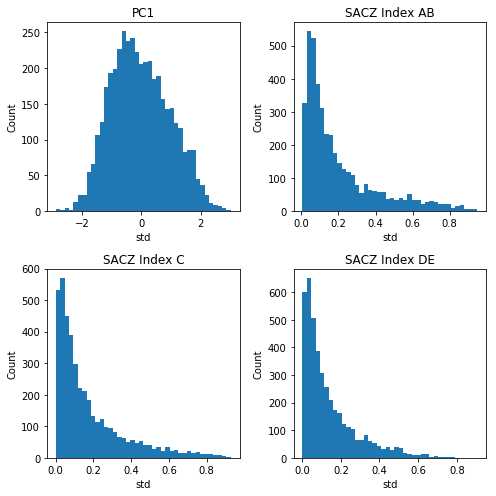

In [22]:
fig = plt.figure(figsize=(7,7))

ax = fig.add_subplot(221)
plt.hist(data['PC1'], bins=40)
plt.ylabel('Count'); plt.xlabel('std')
plt.title('PC1')

ax = fig.add_subplot(222)
plt.hist(data['AB'], bins=40)
plt.ylabel('Count'); plt.xlabel('std')
plt.title('SACZ Index AB')

ax = fig.add_subplot(223)
plt.hist(data['C'], bins=40)
plt.ylabel('Count'); plt.xlabel('std')
plt.title('SACZ Index C')

ax = fig.add_subplot(224)
plt.hist(data['DE'], bins=40)
plt.ylabel('Count'); plt.xlabel('std')
plt.title('SACZ Index DE')

plt.tight_layout()
plt.show()
fig.savefig('Histogram.png', dpi=300)

It is clear that PC1 is normally distributed, but the SACZ indices are heavily skewed. So we will normalize them to Gaussian (or Gaussian-like) distributions using the Cox-Box Method. This is important to allow us to do parametric statistics, like simple correlations. 

In [62]:
data['AB'] = ps.standardize(stats.boxcox(data['AB'].values, 0))
data['C']  = ps.standardize(stats.boxcox(data['C'] .values, 0))
data['DE'] = ps.standardize(stats.boxcox(data['DE'].values, 0))

Now, with the normalized indices:

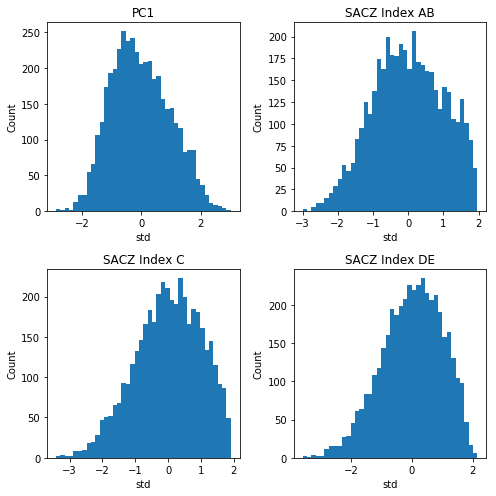

In [63]:
fig = plt.figure(figsize=(7,7))

ax = fig.add_subplot(221)
plt.hist(data['PC1'], bins=40)
plt.ylabel('Count'); plt.xlabel('std')
plt.title('PC1')

ax = fig.add_subplot(222)
plt.hist(data['AB'], bins=40)
plt.ylabel('Count'); plt.xlabel('std')
plt.title('SACZ Index AB')

ax = fig.add_subplot(223)
plt.hist(data['C'], bins=40)
plt.ylabel('Count'); plt.xlabel('std')
plt.title('SACZ Index C')

ax = fig.add_subplot(224)
plt.hist(data['DE'], bins=40)
plt.ylabel('Count'); plt.xlabel('std')
plt.title('SACZ Index DE')

plt.tight_layout()
plt.show()
fig.savefig('Histogram_Normalized.png', dpi=300)

## Correlations

#### Quick Correlation Matrix

In [64]:
data[['PC1', 'PC2', 'PC3', 'AB', 'C', 'DE']].corr()

,PC1,PC2,PC3,AB,C,DE
PC1,1.000000,0.011344,0.003095,0.696586,0.565022,0.204234
PC2,0.011344,1.000000,-0.019217,-0.279863,-0.156239,-0.236098
PC3,0.003095,-0.019217,1.000000,0.024026,-0.431086,-0.269516
AB,0.696586,-0.279863,0.024026,1.000000,0.696723,0.512948
C,0.565022,-0.156239,-0.431086,0.696723,1.000000,0.614262
DE,0.204234,-0.236098,-0.269516,0.512948,0.614262,1.000000


From here on, all correlations are with PC1 only.

#### Separate per ENSO phase

In [65]:
ne = data[data['ENSO']=='NE']
en = data[data['ENSO']=='EN']
ln = data[data['ENSO']=='LN']
all_corr = data[['PC1', 'AB', 'C', 'DE']].corr()
en_corr  = en[['PC1', 'AB', 'C', 'DE']].corr()
ln_corr  = ln[['PC1', 'AB', 'C', 'DE']].corr()
ne_corr  = ne[['PC1', 'AB', 'C', 'DE']].corr()

enso_corrmat = np.vstack([all_corr['PC1'], en_corr['PC1'], ln_corr['PC1'], ne_corr['PC1']] )
df_enso_corrmat = pd.DataFrame(np.round(enso_corrmat[:,1:], decimals=2), 
                               columns=['North (AB)', 'Mean (C)', 'South (DE)'],
                               index=['All', 'El Nino', 'La Nina', 'Neutral'])
cm = sns.light_palette("green", as_cmap=True)
out = df_enso_corrmat.style.background_gradient(cmap=cm, axis=None)\
.set_caption("Correlations between PC1 and SACZ Indices per ENSO Phase")
out

,North (AB),Mean (C),South (DE)
All,0.7,0.57,0.2
El Nino,0.68,0.56,0.26
La Nina,0.68,0.52,0.08
Neutral,0.73,0.62,0.27


#### Separate per month

In [66]:
nov = data[data['Mes']==11]
dec = data[data['Mes']==12]
jan = data[data['Mes']==1]
feb = data[data['Mes']==2]
mar = data[data['Mes']==3]
nov_corr = nov[['PC1', 'AB', 'C', 'DE']].corr()
dev_corr = dec[['PC1', 'AB', 'C', 'DE']].corr()
jan_corr = jan[['PC1', 'AB', 'C', 'DE']].corr()
feb_corr = feb[['PC1', 'AB', 'C', 'DE']].corr()
mar_corr = mar[['PC1', 'AB', 'C', 'DE']].corr()

mon_corrmat = np.vstack([nov_corr['PC1'], dev_corr['PC1'], jan_corr['PC1'], feb_corr['PC1'], mar_corr['PC1']] )
df_mon_corrmat = pd.DataFrame(np.round(mon_corrmat[:,1:], decimals=2),
                              columns=['North (AB)', 'Mean (C)', 'South (DE)'],
                              index=['Nov', 'Dec', 'Jan', 'Feb', 'Mar'])
cm = sns.light_palette("green", as_cmap=True)
out = df_mon_corrmat.style.background_gradient(cmap=cm, axis=None)\
.set_caption("Correlations between PC1 and SACZ Indices per Month")
out

,North (AB),Mean (C),South (DE)
Nov,0.71,0.56,0.27
Dec,0.73,0.57,0.24
Jan,0.73,0.68,0.29
Feb,0.65,0.55,0.16
Mar,0.68,0.56,0.22


## Scatterplots

#### All Days

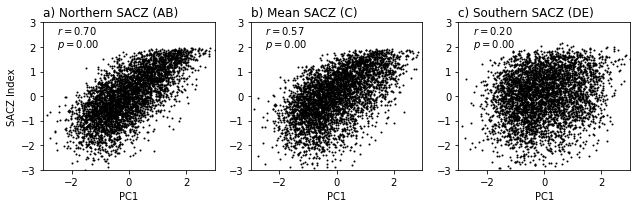

In [69]:
fig = plt.figure(figsize=(9,3))

fig.add_subplot(131)
plt.scatter(data['PC1'], data['AB'], s=1, c='k')
plt.xlabel('PC1'); plt.ylabel('SACZ Index')
r, p = stats.pearsonr(data['PC1'], data['AB'])
plt.text(-2.5, 2.5, r'$r=%.2f$' %r)
plt.text(-2.5, 2.0, r'$p=%.2f$' %p)
plt.ylim((-3,3)); plt.xlim((-3,3))
plt.title('a) Northern SACZ (AB)', loc='left')

fig.add_subplot(132)
plt.scatter(data['PC1'], data['C'], s=1, c='k')
plt.xlabel('PC1'); # plt.ylabel('SACZ Index')
r, p = stats.pearsonr(data['PC1'], data['C'])
plt.text(-2.5, 2.5, r'$r=%.2f$' %r)
plt.text(-2.5, 2.0, r'$p=%.2f$' %p)
plt.ylim((-3,3)); plt.xlim((-3,3))
plt.title('b) Mean SACZ (C)', loc='left')

fig.add_subplot(133)
plt.scatter(data['PC1'], data['DE'], s=1, c='k')
plt.xlabel('PC1'); # plt.ylabel('SACZ Index')
r, p = stats.pearsonr(data['PC1'], data['DE'])
plt.text(-2.5, 2.5, r'$r=%.2f$' %r)
plt.text(-2.5, 2.0, r'$p=%.2f$' %p)
plt.ylim((-3,3)); plt.xlim((-3,3))
plt.title('c) Southern SACZ (DE)', loc='left')

plt.tight_layout()
plt.show()
fig.savefig('Scatter_All.png', dpi=300)

#### El Niño

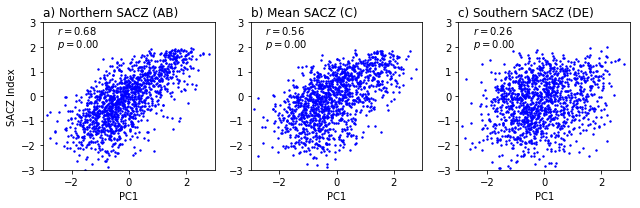

In [70]:
fig = plt.figure(figsize=(9,3))

fig.add_subplot(131)
plt.scatter(en['PC1'], en['AB'], s=2, c='b')
plt.xlabel('PC1'); plt.ylabel('SACZ Index')
r, p = stats.pearsonr(en['PC1'], en['AB'])
plt.text(-2.5, 2.5, r'$r=%.2f$' %r)
plt.text(-2.5, 2.0, r'$p=%.2f$' %p)
plt.ylim((-3,3)); plt.xlim((-3,3))
plt.title('a) Northern SACZ (AB)', loc='left')

fig.add_subplot(132)
plt.scatter(en['PC1'], en['C'], s=2, c='b')
plt.xlabel('PC1'); # plt.ylaben('SACZ Index')
r, p = stats.pearsonr(en['PC1'], en['C'])
plt.text(-2.5, 2.5, r'$r=%.2f$' %r)
plt.text(-2.5, 2.0, r'$p=%.2f$' %p)
plt.ylim((-3,3)); plt.xlim((-3,3))
plt.title('b) Mean SACZ (C)', loc='left')

fig.add_subplot(133)
plt.scatter(en['PC1'], en['DE'], s=2, c='b')
plt.xlabel('PC1'); # plt.ylaben('SACZ Index')
r, p = stats.pearsonr(en['PC1'], en['DE'])
plt.text(-2.5, 2.5, r'$r=%.2f$' %r)
plt.text(-2.5, 2.0, r'$p=%.2f$' %p)
plt.ylim((-3,3)); plt.xlim((-3,3))
plt.title('c) Southern SACZ (DE)', loc='left')

plt.tight_layout()
plt.show()
fig.savefig('Scatter_EN.png', dpi=300)

#### La Niña

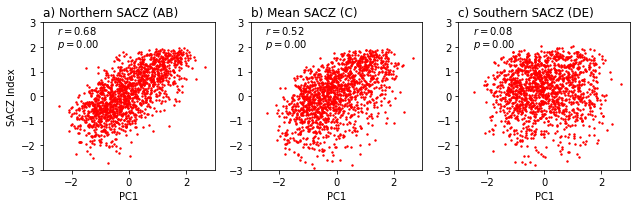

In [71]:
fig = plt.figure(figsize=(9,3))

fig.add_subplot(131)
plt.scatter(ln['PC1'], ln['AB'], s=2, c='r')
plt.xlabel('PC1'); plt.ylabel('SACZ Index')
r, p = stats.pearsonr(ln['PC1'], ln['AB'])
plt.text(-2.5, 2.5, r'$r=%.2f$' %r)
plt.text(-2.5, 2.0, r'$p=%.2f$' %p)
plt.ylim((-3,3)); plt.xlim((-3,3))
plt.title('a) Northern SACZ (AB)', loc='left')

fig.add_subplot(132)
plt.scatter(ln['PC1'], ln['C'], s=2, c='r')
plt.xlabel('PC1'); # plt.ylaben('SACZ Index')
r, p = stats.pearsonr(ln['PC1'], ln['C'])
plt.text(-2.5, 2.5, r'$r=%.2f$' %r)
plt.text(-2.5, 2.0, r'$p=%.2f$' %p)
plt.ylim((-3,3)); plt.xlim((-3,3))
plt.title('b) Mean SACZ (C)', loc='left')

fig.add_subplot(133)
plt.scatter(ln['PC1'], ln['DE'], s=2, c='r')
plt.xlabel('PC1'); # plt.ylaben('SACZ Index')
r, p = stats.pearsonr(ln['PC1'], ln['DE'])
plt.text(-2.5, 2.5, r'$r=%.2f$' %r)
plt.text(-2.5, 2.0, r'$p=%.2f$' %p)
plt.ylim((-3,3)); plt.xlim((-3,3))
plt.title('c) Southern SACZ (DE)', loc='left')

plt.tight_layout()
plt.show()
fig.savefig('Scatter_LN.png', dpi=300)

#### Neutral ENSO

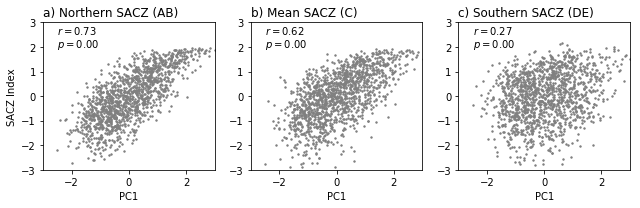

In [72]:
fig = plt.figure(figsize=(9,3))

fig.add_subplot(131)
plt.scatter(ne['PC1'], ne['AB'], s=2, c='grey')
plt.xlabel('PC1'); plt.ylabel('SACZ Index')
r, p = stats.pearsonr(ne['PC1'], ne['AB'])
plt.text(-2.5, 2.5, r'$r=%.2f$' %r)
plt.text(-2.5, 2.0, r'$p=%.2f$' %p)
plt.ylim((-3,3)); plt.xlim((-3,3))
plt.title('a) Northern SACZ (AB)', loc='left')

fig.add_subplot(132)
plt.scatter(ne['PC1'], ne['C'], s=2, c='grey')
plt.xlabel('PC1'); # plt.ylabel('SACZ Index')
r, p = stats.pearsonr(ne['PC1'], ne['C'])
plt.text(-2.5, 2.5, r'$r=%.2f$' %r)
plt.text(-2.5, 2.0, r'$p=%.2f$' %p)
plt.ylim((-3,3)); plt.xlim((-3,3))
plt.title('b) Mean SACZ (C)', loc='left')

fig.add_subplot(133)
plt.scatter(ne['PC1'], ne['DE'], s=2, c='grey')
plt.xlabel('PC1'); # plt.ylabel('SACZ Index')
r, p = stats.pearsonr(ne['PC1'], ne['DE'])
plt.text(-2.5, 2.5, r'$r=%.2f$' %r)
plt.text(-2.5, 2.0, r'$p=%.2f$' %p)
plt.ylim((-3,3)); plt.xlim((-3,3))
plt.title('c) Southern SACZ (DE)', loc='left')

plt.tight_layout()
plt.show()
fig.savefig('Scatter_NE.png', dpi=300)

## Time Series

Example from Summer 2012-2013

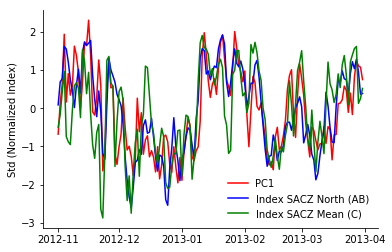

In [75]:
ex2012_2013 = data[((data['Dia'].dt.year==2012) & (data['Dia'].dt.month>10)) |\
                   ((data['Dia'].dt.year==2013) & (data['Dia'].dt.month<4))]

fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
ps.nospines(ax)
plt.plot(ex2012_2013['Dia'], ex2012_2013['PC1'].values, c='r', label='PC1')
plt.plot(ex2012_2013['Dia'], ex2012_2013['AB'].values, c='b', label='Index SACZ North (AB)')
plt.plot(ex2012_2013['Dia'], ex2012_2013['C'].values,  c='g', label='Index SACZ Mean (C)')
plt.ylabel('Std (Normalized Index)')
plt.legend(frameon=False)
plt.show()

fig.savefig('Example_2012-2013.png', dpi=300)